In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.optim import Adam
from torch.nn import BCEWithLogitsLoss
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import classification_report
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

In [ ]:
import pandas as pd
import json
import os

# Load dataset from JSONL file
def load_dataset(file_path):
    dataset = []
    with open(file_path, 'r') as file:
        for line in file:
            example = json.loads(line)
            dataset.append(example)
    return dataset

# Define file paths
train_file = '/content/drive/My Drive/Hateful-memes/data/train.jsonl'
image_directory = '/content/drive/My Drive/Hateful-memes/data/'

# Load train dataset
train_dataset = load_dataset(train_file)

chosen_examples = train_dataset

# Create DataFrame
data = []
for idx, example in enumerate(chosen_examples):
    text = example['text']
    img_path = os.path.join(image_directory, example['img'])
    label = example['label']
    data.append({'id': idx, 'img_text': text, 'img_path': img_path, 'label': label})

df = pd.DataFrame(data)

# Display DataFrame
print(df.head())


   id                                           img_text  \
0   0   its their character not their color that matters   
1   1  don't be afraid to love again everyone is not ...   
2   2                           putting bows on your pet   
3   3  i love everything and everybody! except for sq...   
4   4  everybody loves chocolate chip cookies, even h...   

                                            img_path  label  
0  /content/drive/My Drive/Hateful-memes/data/img...      0  
1  /content/drive/My Drive/Hateful-memes/data/img...      0  
2  /content/drive/My Drive/Hateful-memes/data/img...      0  
3  /content/drive/My Drive/Hateful-memes/data/img...      0  
4  /content/drive/My Drive/Hateful-memes/data/img...      0  


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame without headers
combined_df = pd.read_csv("/content/drive/My Drive/combined_data.csv", header=None)

# Display the DataFrame
print(combined_df)

          0         1         2         3         4         5         6     \
0     0.088745  0.020776  0.689626  0.025900  0.059514 -0.182556  0.441299   
1     0.367180 -0.027867 -0.005314 -0.013434 -0.136414  0.180195  0.241085   
2    -0.306488  0.492989 -0.190834 -0.135500 -0.222576 -0.911024  0.151109   
3     0.008281 -0.029198 -0.285411 -0.411831 -0.461291  0.769305  0.377357   
4    -0.137856  0.444419  0.057167  0.123545 -0.075588  0.197342 -0.396554   
...        ...       ...       ...       ...       ...       ...       ...   
8494  0.149635  0.182981 -0.111240  0.034236  0.219128 -0.438370  0.363627   
8495  0.186534  0.368822  0.147354  0.417798  0.257255  0.151404  0.365545   
8496  0.172430 -0.284663 -0.438813  0.005433 -0.093107 -0.019834 -0.065302   
8497  0.180836  0.121934  0.364211  0.435060 -0.321626 -0.104927  0.288741   
8498  0.444135 -0.266824 -0.036447  0.130761  0.074152 -0.269357  0.472297   

          7         8         9     ...      1302      1303    

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

features = combined_df.values
labels = df['label'].values
labels = np.delete(labels, 8000)

#features = combined_df.values[:8000]
#labels = df['label'].values[:8000]

In [ ]:
print(features.shape)
print(features)
print(labels)
print(len(labels))

(8499, 1312)
[[ 0.08874453  0.02077581  0.68962622 ...  0.05736732  0.03642895
   0.003736  ]
 [ 0.36718032 -0.02786725 -0.00531351 ... -0.19923991  0.48033586
  -0.17791143]
 [-0.30648834  0.49298909 -0.19083402 ...  0.05717846  0.03573957
  -0.10243616]
 ...
 [ 0.17243025 -0.28466251 -0.43881333 ...  0.73638278 -0.07671228
   0.3625887 ]
 [ 0.18083626  0.12193359  0.3642107  ...  0.47830135 -0.38205299
  -0.43560866]
 [ 0.44413501 -0.26682401 -0.03644675 ...  0.37211135  0.03075689
  -0.2047766 ]]
[0 0 0 ... 1 1 1]
8499


In [ ]:
# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# Convert input data to float32
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)

In [ ]:
import json
from tensorflow.keras.models import model_from_json

with open("/content/drive/My Drive/clip_model_nn.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("/content/drive/My Drive/clip_model_nn.h5")


In [ ]:
loaded_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 256)               336128    
                                                                 
 dropout_48 (Dropout)        (None, 256)               0         
                                                                 
 dense_61 (Dense)            (None, 128)               32896     
                                                                 
 dropout_49 (Dropout)        (None, 128)               0         
                                                                 
 dense_62 (Dense)            (None, 64)                8256      
                                                                 
 dropout_50 (Dropout)        (None, 64)                0         
                                                                 
 dense_63 (Dense)            (None, 32)              

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Make predictions on validation data
y_pred_prob = loaded_model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_val, y_pred_prob)

# Calculate F1 score
f1 = f1_score(y_val, y_pred)

# Calculate precision
precision = precision_score(y_val, y_pred)

# Calculate recall
recall = recall_score(y_val, y_pred)

print("ROC-AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

54/54 [==============================] - 0s 2ms/step
ROC-AUC Score: 0.765132320139985
F1 Score: 0.4709897610921502
Precision: 0.7392857142857143
Recall: 0.34557595993322204


In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Make predictions on validation data
y_pred_prob = loaded_model.predict(X_val)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_val, y_pred_prob)

# Calculate F1 score
f1 = f1_score(y_val, y_pred)

# Calculate precision
precision = precision_score(y_val, y_pred)

# Calculate recall
recall = recall_score(y_val, y_pred)

print("ROC-AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

54/54 [==============================] - 0s 6ms/step
ROC-AUC Score: 0.765132320139985
F1 Score: 0.4709897610921502
Precision: 0.7392857142857143
Recall: 0.34557595993322204


In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Define the neural network model with dropout
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/30
240/240 [==============================] - 3s 8ms/step - loss: 0.6652 - accuracy: 0.6171 - val_loss: 0.6343 - val_accuracy: 0.6694
Epoch 2/30
240/240 [==============================] - 3s 11ms/step - loss: 0.6508 - accuracy: 0.6341 - val_loss: 0.6275 - val_accuracy: 0.6694
Epoch 3/30
240/240 [==============================] - 3s 11ms/step - loss: 0.6382 - accuracy: 0.6366 - val_loss: 0.6077 - val_accuracy: 0.6706
Epoch 4/30
240/240 [==============================] - 2s 7ms/step - loss: 0.6282 - accuracy: 0.6428 - val_loss: 0.6000 - val_accuracy: 0.6718
Epoch 5/30
240/240 [==============================] - 2s 7ms/step - loss: 0.6185 - accuracy: 0.6588 - val_loss: 0.5993 - val_accuracy: 0.6906
Epoch 6/30
240/240 [==============================] - 2s 7ms/step - loss: 0.6046 - accuracy: 0.6683 - val_loss: 0.5852 - val_accuracy: 0.6988
Epoch 7/30
240/240 [==============================] - 2s 8ms/step - loss: 0.6000 - accuracy: 0.6768 - val_loss: 0.5819 - val_accuracy: 0.6965
Epoc

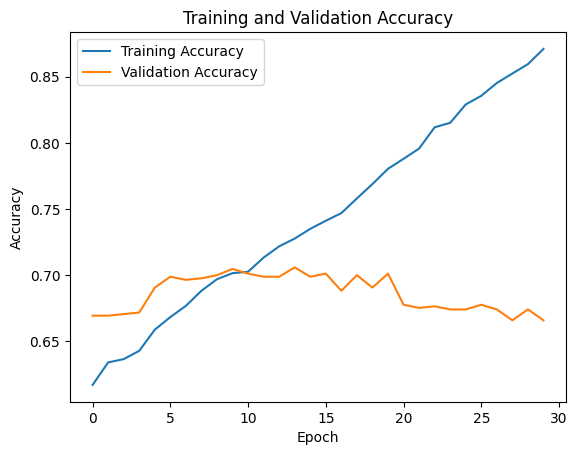

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Epoch 1/30
240/240 [==============================] - 6s 16ms/step - loss: 0.6666 - accuracy: 0.6301 - val_loss: 0.6567 - val_accuracy: 0.6694
Epoch 2/30
240/240 [==============================] - 3s 13ms/step - loss: 0.6551 - accuracy: 0.6359 - val_loss: 0.6489 - val_accuracy: 0.6694
Epoch 3/30
240/240 [==============================] - 3s 12ms/step - loss: 0.6388 - accuracy: 0.6428 - val_loss: 0.6117 - val_accuracy: 0.6753
Epoch 4/30
240/240 [==============================] - 3s 10ms/step - loss: 0.6323 - accuracy: 0.6537 - val_loss: 0.6095 - val_accuracy: 0.6729
Epoch 5/30
240/240 [==============================] - 2s 10ms/step - loss: 0.6210 - accuracy: 0.6623 - val_loss: 0.6034 - val_accuracy: 0.6882
Epoch 6/30
240/240 [==============================] - 2s 9ms/step - loss: 0.6061 - accuracy: 0.6696 - val_loss: 0.6048 - val_accuracy: 0.7094
Epoch 7/30
240/240 [==============================] - 2s 9ms/step - loss: 0.5955 - accuracy: 0.6856 - val_loss: 0.5852 - val_accuracy: 0.6941
E

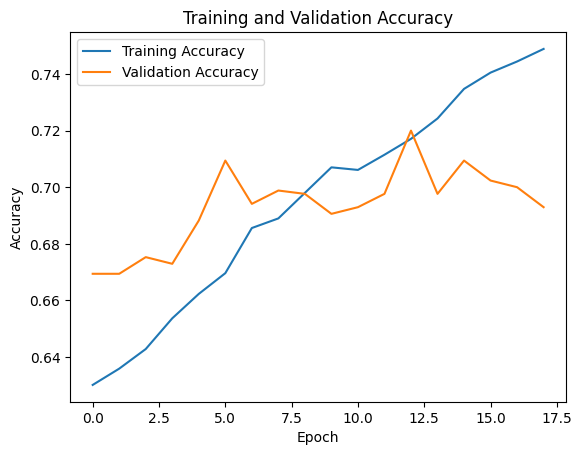

In [ ]:
from tensorflow import keras
from keras.callbacks import EarlyStopping

# Define the neural network model with dropout
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer and learning rate
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
# Save the model architecture to JSON file
model_json = model.to_json()
with open("model_nn.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to HDF5 file
model.save_weights("model_nn.h5")


Epoch 1/30
240/240 [==============================] - 3s 7ms/step - loss: 0.6372 - accuracy: 0.6481 - val_loss: 0.6036 - val_accuracy: 0.6894
Epoch 2/30
240/240 [==============================] - 2s 6ms/step - loss: 0.5906 - accuracy: 0.6871 - val_loss: 0.5941 - val_accuracy: 0.6894
Epoch 3/30
240/240 [==============================] - 2s 7ms/step - loss: 0.5702 - accuracy: 0.7010 - val_loss: 0.5857 - val_accuracy: 0.7047
Epoch 4/30
240/240 [==============================] - 2s 10ms/step - loss: 0.5448 - accuracy: 0.7221 - val_loss: 0.5915 - val_accuracy: 0.6835
Epoch 5/30
240/240 [==============================] - 2s 8ms/step - loss: 0.5180 - accuracy: 0.7436 - val_loss: 0.5950 - val_accuracy: 0.6753
Epoch 6/30
240/240 [==============================] - 1s 6ms/step - loss: 0.4999 - accuracy: 0.7511 - val_loss: 0.5845 - val_accuracy: 0.6988
Epoch 7/30
240/240 [==============================] - 2s 6ms/step - loss: 0.4612 - accuracy: 0.7760 - val_loss: 0.6371 - val_accuracy: 0.6824
Epoch

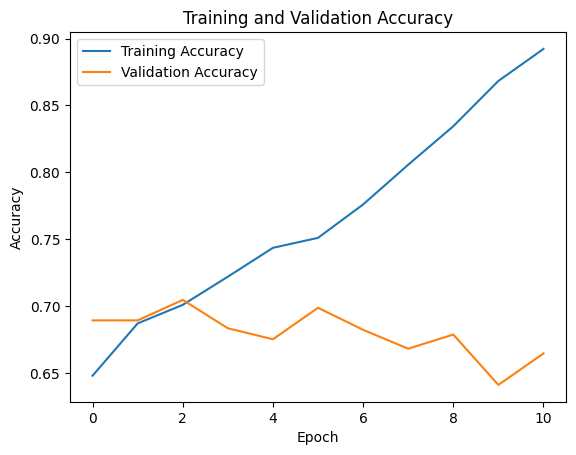

In [ ]:
from tensorflow import keras
from keras.callbacks import EarlyStopping

# Define the neural network model with dropout
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer and learning rate
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Epoch 1/30
225/225 [==============================] - 4s 13ms/step - loss: 0.6633 - accuracy: 0.6361 - val_loss: 0.6474 - val_accuracy: 0.6425
Epoch 2/30
225/225 [==============================] - 2s 9ms/step - loss: 0.6456 - accuracy: 0.6501 - val_loss: 0.6447 - val_accuracy: 0.6425
Epoch 3/30
225/225 [==============================] - 2s 9ms/step - loss: 0.6360 - accuracy: 0.6544 - val_loss: 0.6271 - val_accuracy: 0.6550
Epoch 4/30
225/225 [==============================] - 2s 9ms/step - loss: 0.6181 - accuracy: 0.6646 - val_loss: 0.6119 - val_accuracy: 0.6837
Epoch 5/30
225/225 [==============================] - 2s 9ms/step - loss: 0.6072 - accuracy: 0.6789 - val_loss: 0.6009 - val_accuracy: 0.6825
Epoch 6/30
225/225 [==============================] - 3s 12ms/step - loss: 0.5963 - accuracy: 0.6819 - val_loss: 0.5883 - val_accuracy: 0.6862
Epoch 7/30
225/225 [==============================] - 3s 12ms/step - loss: 0.5901 - accuracy: 0.6925 - val_loss: 0.5872 - val_accuracy: 0.6963
Epo

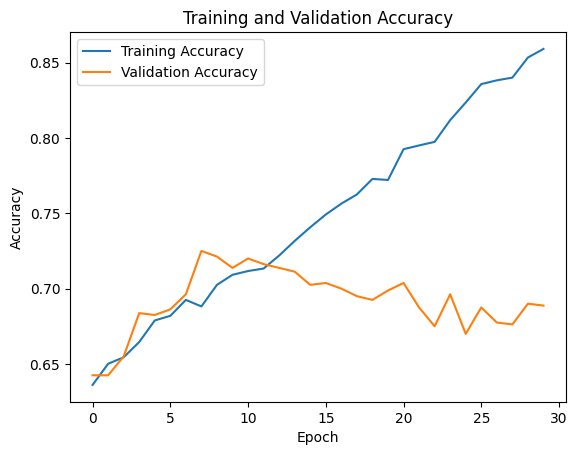

In [ ]:
from tensorflow import keras
from keras.callbacks import EarlyStopping

# Define the neural network model with dropout
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer and learning rate
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create the SVM model with sigmoid kernel
svm_model_sigmoid = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model_sigmoid.fit(X_train, y_train)

# Predict on the validation set
y_pred_sigmoid = svm_model_sigmoid.predict(X_val)

# Calculate accuracy
accuracy_sigmoid = accuracy_score(y_val, y_pred_sigmoid)
print("Sigmoid Kernel Accuracy:", accuracy_sigmoid)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame with features
#features = combined_df.values
#labels = df['label'].values
#labels = np.delete(labels, 8000)

features = combined_df.values[:8000]
labels = df['label'].values[:8000]

In [ ]:
print(features.shape)
print(features)
print(labels)
print(len(labels))

(8000, 1312)
[[ 0.08874453  0.02077581  0.68962622 ...  0.05736732  0.03642895
   0.003736  ]
 [ 0.36718032 -0.02786725 -0.00531351 ... -0.19923991  0.48033586
  -0.17791143]
 [-0.30648834  0.49298909 -0.19083402 ...  0.05717846  0.03573957
  -0.10243616]
 ...
 [ 0.06943426  0.00197647  0.13447231 ...  0.63740438 -0.12926257
  -0.43566748]
 [ 0.2215389   0.21170886 -0.06627523 ...  0.72819942 -0.20458461
   0.26142874]
 [ 0.16527599  0.42321712  0.18959455 ... -0.30343175 -0.17984803
  -0.46072489]]
[0 0 0 ... 1 0 0]
8000


In [ ]:
# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# Convert input data to float32
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)

Epoch 1/30
213/213 [==============================] - 11s 50ms/step - loss: 0.6567 - accuracy: 0.6360 - val_loss: 0.6346 - val_accuracy: 0.6476
Epoch 2/30
213/213 [==============================] - 10s 49ms/step - loss: 0.6373 - accuracy: 0.6492 - val_loss: 0.6246 - val_accuracy: 0.6612
Epoch 3/30
213/213 [==============================] - 10s 48ms/step - loss: 0.6251 - accuracy: 0.6558 - val_loss: 0.6234 - val_accuracy: 0.6700
Epoch 4/30
213/213 [==============================] - 10s 45ms/step - loss: 0.6139 - accuracy: 0.6629 - val_loss: 0.6166 - val_accuracy: 0.6582
Epoch 5/30
213/213 [==============================] - 10s 48ms/step - loss: 0.6107 - accuracy: 0.6673 - val_loss: 0.6117 - val_accuracy: 0.6712
Epoch 6/30
213/213 [==============================] - 10s 48ms/step - loss: 0.6030 - accuracy: 0.6797 - val_loss: 0.6751 - val_accuracy: 0.6588
Epoch 7/30
213/213 [==============================] - 10s 48ms/step - loss: 0.5964 - accuracy: 0.6860 - val_loss: 0.6036 - val_accuracy:

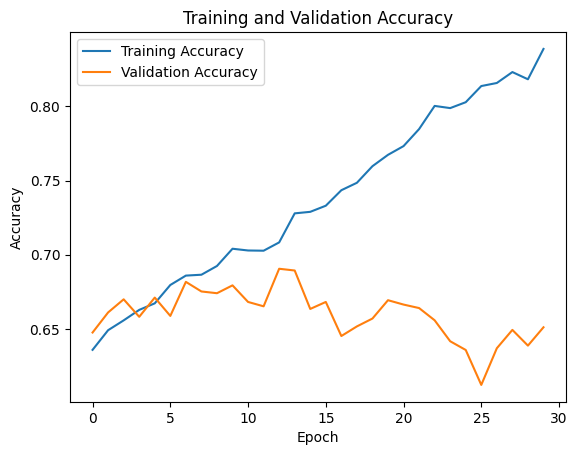

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the neural network model with 1D convolutional layers and dropout
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer and learning rate
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Reshape X_train and X_val to include a channel dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val_reshaped, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Epoch 1/50
200/200 [==============================] - 7s 32ms/step - loss: 0.6484 - accuracy: 0.6478 - val_loss: 0.6436 - val_accuracy: 0.6494 - lr: 1.0000e-04
Epoch 2/50
200/200 [==============================] - 6s 30ms/step - loss: 0.6382 - accuracy: 0.6558 - val_loss: 0.6386 - val_accuracy: 0.6494 - lr: 1.0000e-04
Epoch 3/50
200/200 [==============================] - 5s 26ms/step - loss: 0.6324 - accuracy: 0.6541 - val_loss: 0.6327 - val_accuracy: 0.6513 - lr: 1.0000e-04
Epoch 4/50
200/200 [==============================] - 6s 30ms/step - loss: 0.6275 - accuracy: 0.6584 - val_loss: 0.6286 - val_accuracy: 0.6712 - lr: 1.0000e-04
Epoch 5/50
200/200 [==============================] - 5s 25ms/step - loss: 0.6218 - accuracy: 0.6664 - val_loss: 0.6232 - val_accuracy: 0.6538 - lr: 1.0000e-04
Epoch 6/50
200/200 [==============================] - 5s 26ms/step - loss: 0.6140 - accuracy: 0.6722 - val_loss: 0.6169 - val_accuracy: 0.6725 - lr: 1.0000e-04
Epoch 7/50
200/200 [====================

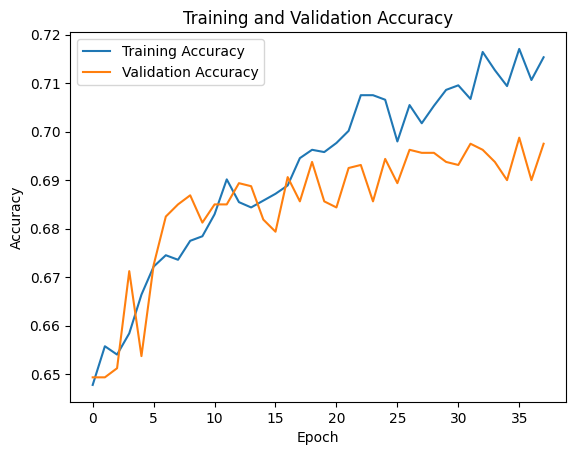

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define the neural network model with 1D convolutional layers and dropout
model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=16, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer and learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Reshape X_train and X_val to include a channel dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

# Train the model with early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val_reshaped, y_val),
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_val_reshaped, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
